In [65]:
import graphlab

In [66]:
graphlab.canvas.set_target('ipynb')

In [67]:
taps = graphlab.SFrame.read_csv("file.csv", column_type_hints=[int, int, str, float, float, float, float, float, str, str, str])

Finished parsing file C:\Users\jenarvaez\Desktop\ML\file.csv

Parsing completed. Parsed 13607 lines in 0.04512 secs.

In [68]:
taps.show()

In [113]:
import random
unique_ids = taps['ID'].unique()
n_taps = len(unique_ids)
example_tap_pos = random.randint(0, n_taps) #change this number and run this cell to change example
example_tap_id = unique_ids[example_tap_pos]
print "Using tap at position %d (id: %d)" % (example_tap_pos, example_tap_id)
example_tap = taps[taps['ID'] == example_tap_id]
print "This tap is a %s (%s)" % (example_tap['type'][0], example_tap['action'][0])

example_before = example_tap[example_tap['when'] == "BEFORE"]
example_during = example_tap[example_tap['when'] == "DURING"]
example_after = example_tap[example_tap['when'] == "AFTER"]


example_accel = example_tap[example_tap['sensor'] == "Accelerometer"]
example_gyro = example_tap[example_tap['sensor'] == "Gyroscope"]
example_rotation = example_tap[example_tap['sensor'] == "RotationVector"]
example_game_rot = example_tap[example_tap['sensor'] == "GameRotationVector"]

example_before_accel = example_before[example_before['sensor'] == "Accelerometer"]
example_before_gyro = example_before[example_before['sensor'] == "Gyroscope"]
example_before_rotation = example_before[example_before['sensor'] == "RotationVector"]
example_before_game_rot = example_before[example_before['sensor'] == "GameRotationVector"]

example_during_accel = example_during[example_during['sensor'] == "Accelerometer"]
example_during_gyro = example_during[example_during['sensor'] == "Gyroscope"]
example_during_rotation = example_during[example_during['sensor'] == "RotationVector"]
example_during_game_rot = example_during[example_during['sensor'] == "GameRotationVector"]

example_after_accel = example_after[example_after['sensor'] == "Accelerometer"]
example_after_gyro = example_after[example_after['sensor'] == "Gyroscope"]
example_after_rotation = example_after[example_after['sensor'] == "RotationVector"]
example_after_game_rot = example_after[example_after['sensor'] == "GameRotationVector"]


Using tap at position 70 (id: 98746535)
This tap is a TOUCH (CENTER-LEFT)


In [118]:
print "Number of game rotation events:", len(example_game_rot) #:///
print "Number of rotation events:",len(example_rotation)
print "Number of accelerometer events:",len(example_accel)
print "Number of gyroscope events:",len(example_gyro)
print "Number of events before tap:", len(example_before)
print "Number of events during tap:", len(example_during)
print "Number of events after tap:", len(example_after)

Number of game rotation events: 0
Number of rotation events: 12
Number of accelerometer events: 52
Number of gyroscope events: 52
Number of events before tap: 46
Number of events during tap: 18
Number of events after tap: 52


# Let's see the data
## Keep in mind this image
<img src="https://developer.android.com/images/axis_device.png">

In [175]:
def plot_bef_dur_aft_events(before_events, during_events, after_events, relevant_features):

    axes = [] #https://www.quora.com/What-is-the-plural-of-axis

    axes.append(before_events['timestamp'] - before_events['timestamp'][0])
    axes.append(during_events['timestamp'] - during_events['timestamp'][0] + axes[-1][-1])
    axes.append(after_events['timestamp'] - after_events['timestamp'][0] + axes[-1][-1])

    fig = plt.figure(figsize=(20,10))
    subplot_number = len(relevant_features) * 100 + 10
    for i in range(len(relevant_features)):
        subplot_number += 1
        axis = fig.add_subplot(subplot_number)
        axis.set_title(relevant_features[i]['meaning'])
        axis.plot(axes[0], before_events[relevant_features[i]['name']], '-', color='g')
        axis.plot(axes[1], during_events[relevant_features[i]['name']], '-', color='r')
        axis.plot(axes[2], after_events[relevant_features[i]['name']], '-', color='g')

# Accelerometer

In [169]:
example_before_accel[['value0', 'value1', "value2"]].show()
example_during_accel[['value0', 'value1', "value2"]].show()
example_after_accel[['value0', 'value1', "value2"]].show()

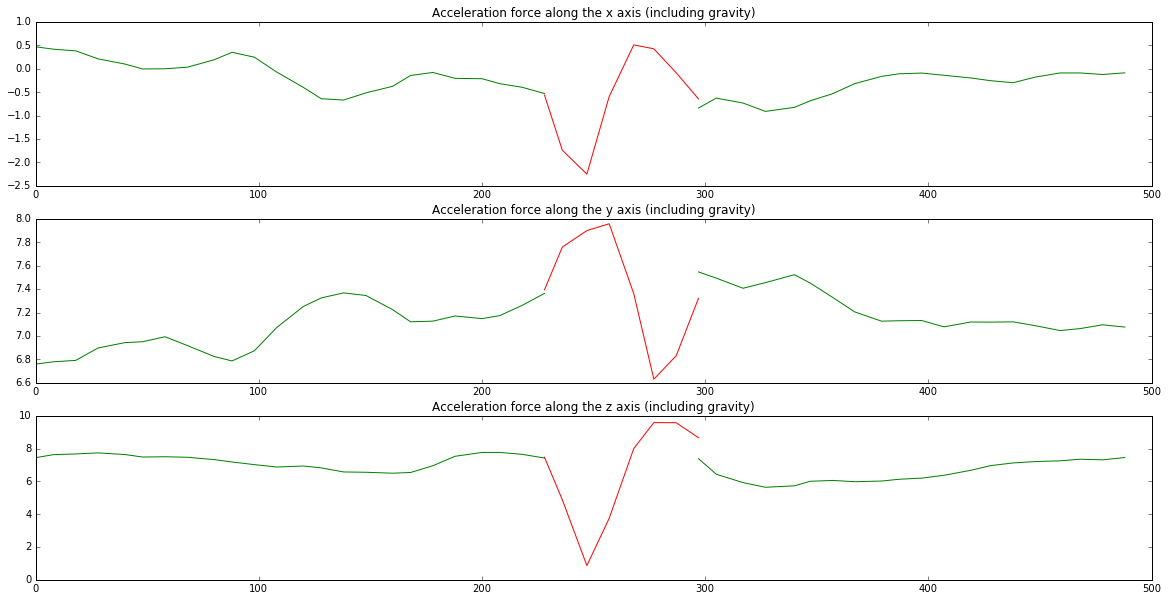

In [170]:
accel_relevant_features = [{'name': 'value0', 'meaning': 'Acceleration force along the x axis (including gravity)'},
                           {'name': 'value1', 'meaning': 'Acceleration force along the y axis (including gravity)'},
                            {'name': 'value2', 'meaning': 'Acceleration force along the z axis (including gravity)'}]
plot_bef_dur_aft_events(example_before_accel, example_during_accel, example_after_accel, accel_relevant_features)

# Gyroscope

In [171]:
example_before_gyro[['value0', 'value1', "value2"]].show()
example_during_gyro[['value0', 'value1', "value2"]].show()
example_after_gyro[['value0', 'value1', "value2"]].show()

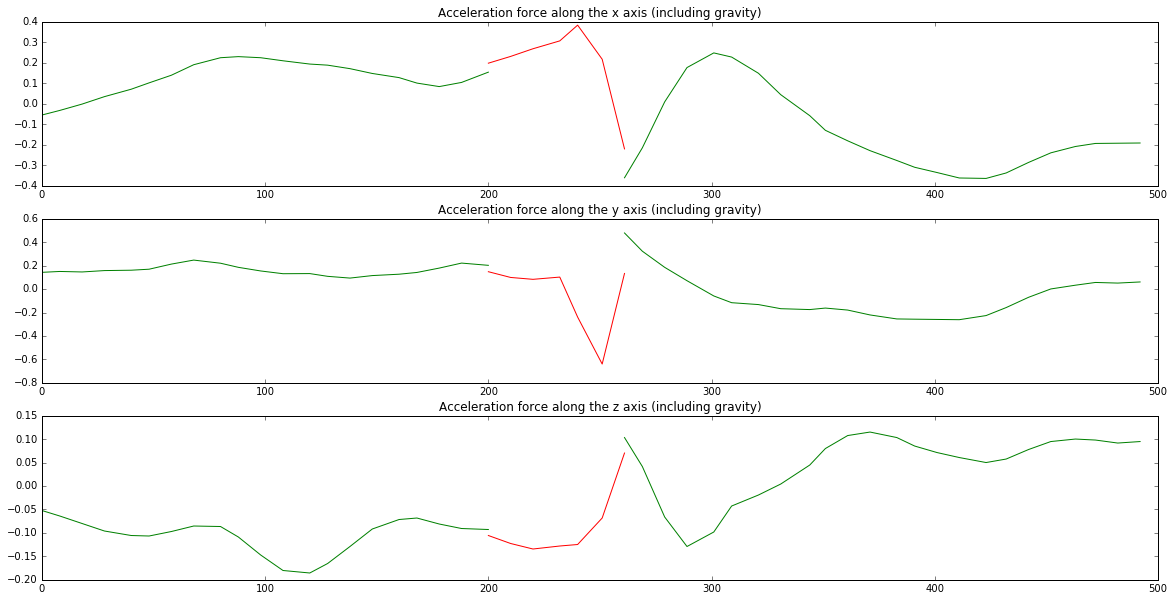

In [161]:
gyro_relevant_features = [{'name': 'value0', 'meaning': 'Rate of rotation around the x axis.'},
                          {'name': 'value1', 'meaning': 'Rate of rotation around the y axis.'},
                          {'name': 'value2', 'meaning': 'Rate of rotation around the z axis.'}]
plot_bef_dur_aft_events(example_before_gyro, example_during_gyro, example_after_gyro, gyro_relevant_features)

It seems like gyroscope could benefit from increasing the "during" window a little towards the "after" section

# Rotation Vector

In [172]:
example_before_rotation[['value0', 'value1', "value2", "value3"]].show()
example_during_rotation[['value0', 'value1', "value2", "value3"]].show()
example_after_rotation[['value0', 'value1', "value2", "value3"]].show()

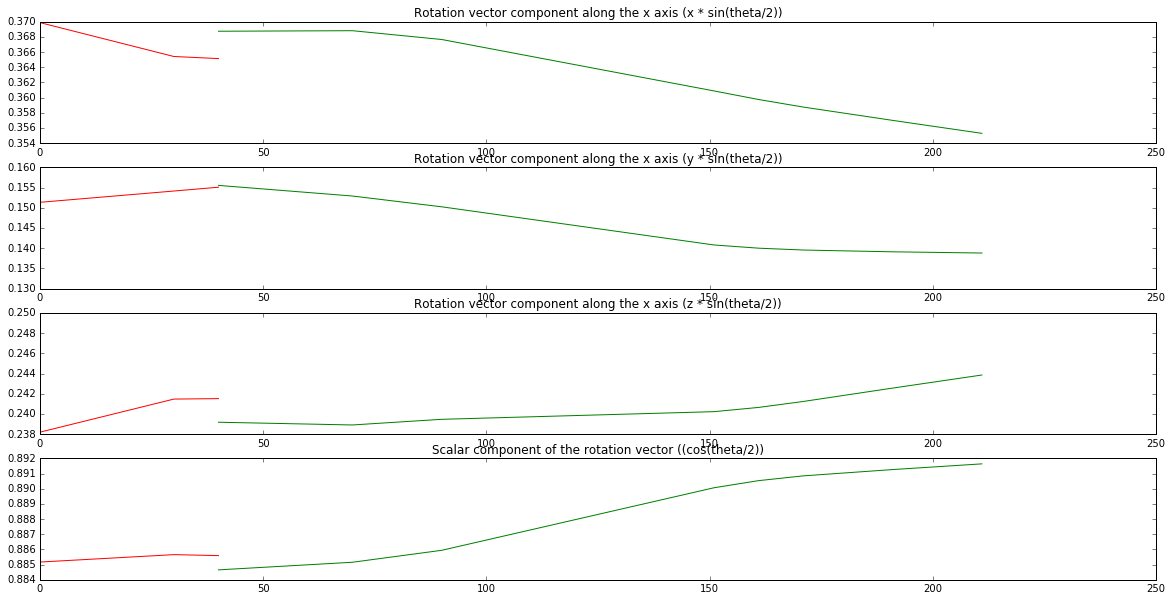

In [177]:
rotation_relevant_features = [{'name': 'value0', 'meaning': 'Rotation vector component along the x axis (x * sin(theta/2))'},
                              {'name': 'value1', 'meaning': 'Rotation vector component along the x axis (y * sin(theta/2))'},
                              {'name': 'value2', 'meaning': 'Rotation vector component along the x axis (z * sin(theta/2))'},
                              {'name': 'value3', 'meaning': 'Scalar component of the rotation vector ((cos(theta/2))'}]
plot_bef_dur_aft_events(example_before_rotation, example_during_rotation, example_after_rotation, rotation_relevant_features)

## Doesn't seem helpful for tap detection, but it might be useful for swipte/tap classification or even action classification

# Let's look at some statistics

In [458]:
def get_rolling_mean(events, window_size):
    return events.rolling_mean(-window_size/2, window_size/2)

def get_rolling_var(events, window_size):
    return events.rolling_var(-window_size/2, window_size/2)

def get_rolling_median(events, window_size, step_size = 1):
    a = [None] * (window_size/2)
    for i in range(0, len(events) - window_size, step_size):
        a.append(events[i:i+window_size].sketch_summary().quantile(0.5))
    a.extend([None] * (window_size/2))
    return a

def get_rolling_max_diff(events, window_size, step_size = 1):
    a = [None] * (window_size/2)
    for i in range(0, len(events) - window_size, step_size):
        a.append(events[i:i+window_size].max() - events[i:i+window_size].min())
    a.extend([None] * (window_size/2))
    return a

def get_rolling_skewness(events, window_size, step_size = 1):
    a = [None] * (window_size/2)
    mean = get_rolling_mean(events, window_size)
    var = get_rolling_var(events, window_size)
    for i in range(0, len(events) - window_size, step_size):
        a.append(sum((events[i:i+window_size] - mean[i+window_size/2]) ** 3) / len(events) / (var[i+window_size/2] ** (3/2)))
    a.extend([None] * (window_size/2))
    return a

def get_rolling_kurtosis(events, window_size, step_size = 1):
    a = [None] * (window_size/2)
    mean = get_rolling_mean(events, window_size)
    var = get_rolling_var(events, window_size)
    for i in range(0, len(events) - window_size, step_size):
        a.append(sum((events[i:i+window_size] - mean[i+window_size/2]) ** 4) / len(events) / (var[i+window_size/2] ** (3/2)))
    a.extend([None] * (window_size/2))
    return a

In [459]:
def plot_events_statistics(sensor_events, relevant_features, window_size=20, statistics='all'):
    
    axis = sensor_events['timestamp'] - sensor_events['timestamp'][0] 
    statistics_funcs = {
        'mean'    : get_rolling_mean,
        'var'     : get_rolling_var,
        'median'  : get_rolling_median,
        'max_diff': get_rolling_max_diff,
        'skewness': get_rolling_skewness,
        'kurtosis': get_rolling_kurtosis
    }
    statistics_to_use = []
    if statistics == "all":
        statistics_to_use = statistics_funcs.keys()
    elif isinstance(statistics, str):
        statistics_to_use.append(statistics)
    else: #assume list
        for statistic in statistics:
            statistics_to_use.append(statistic)
    n_rows = len(relevant_features)
    n_columns = len(statistics_to_use)
    n_cell = 0
    fig = plt.figure(figsize=(20,5*n_rows))
    for i in range(len(relevant_features)):
        for function_name in statistics_to_use:
            function = statistics_funcs[function_name]
            n_cell += 1
            ax = fig.add_subplot(n_rows, n_columns, n_cell)
            ax.set_title(function_name.title())
            ax.plot(axis, sensor_events[relevant_features[i]['name']], '-', color='g')
            ax.plot(axis, function(sensor_events[relevant_features[i]['name']], window_size))

# Accelerometer

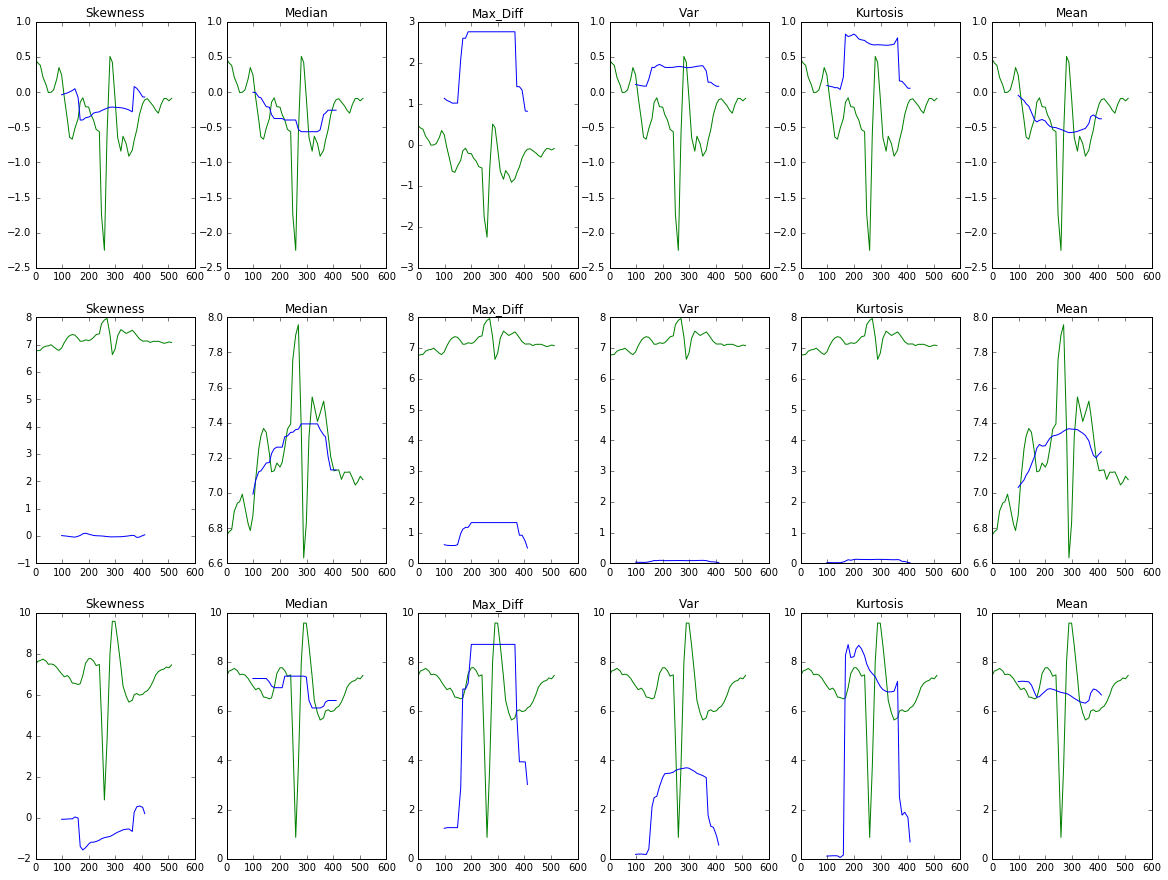

In [512]:
plot_events_statistics(example_accel, accel_relevant_features, window_size=20)

## Let's see only one

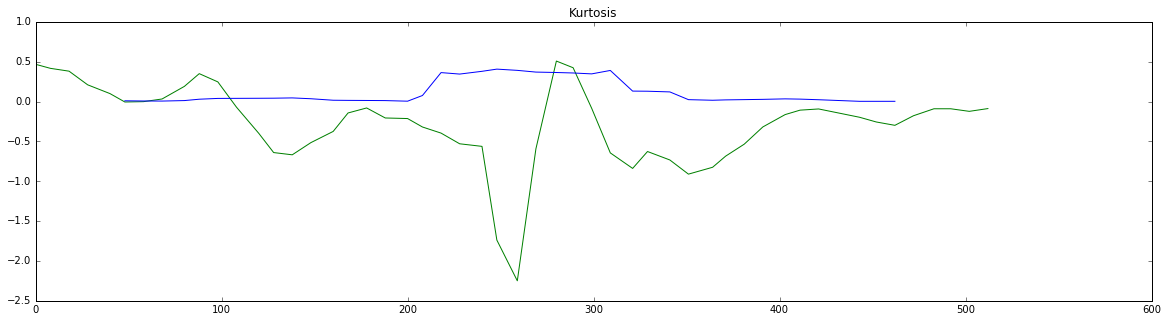

In [464]:
plot_events_statistics(example_accel, [accel_relevant_features[0]], window_size=10, statistics=['kurtosis'])

# Gyroscope

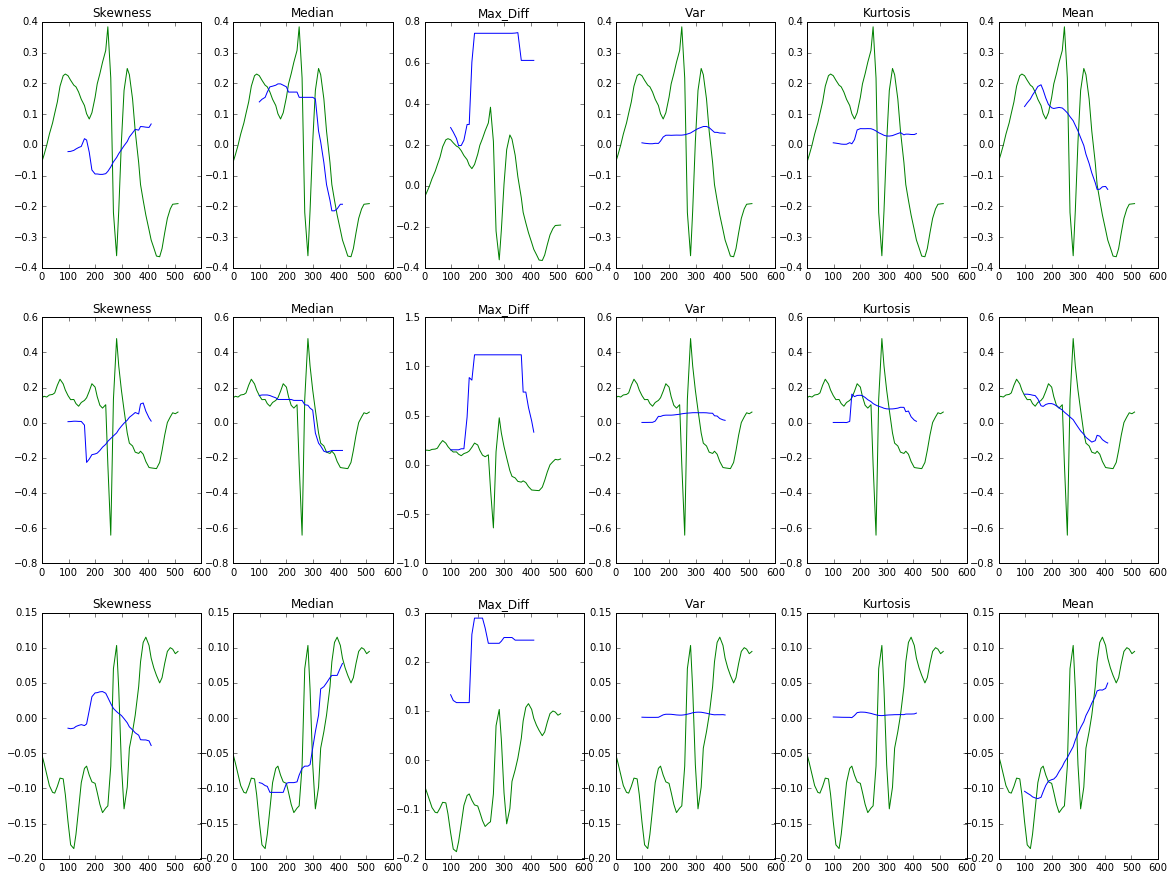

In [511]:
plot_events_statistics(example_gyro, gyro_relevant_features, window_size=20)

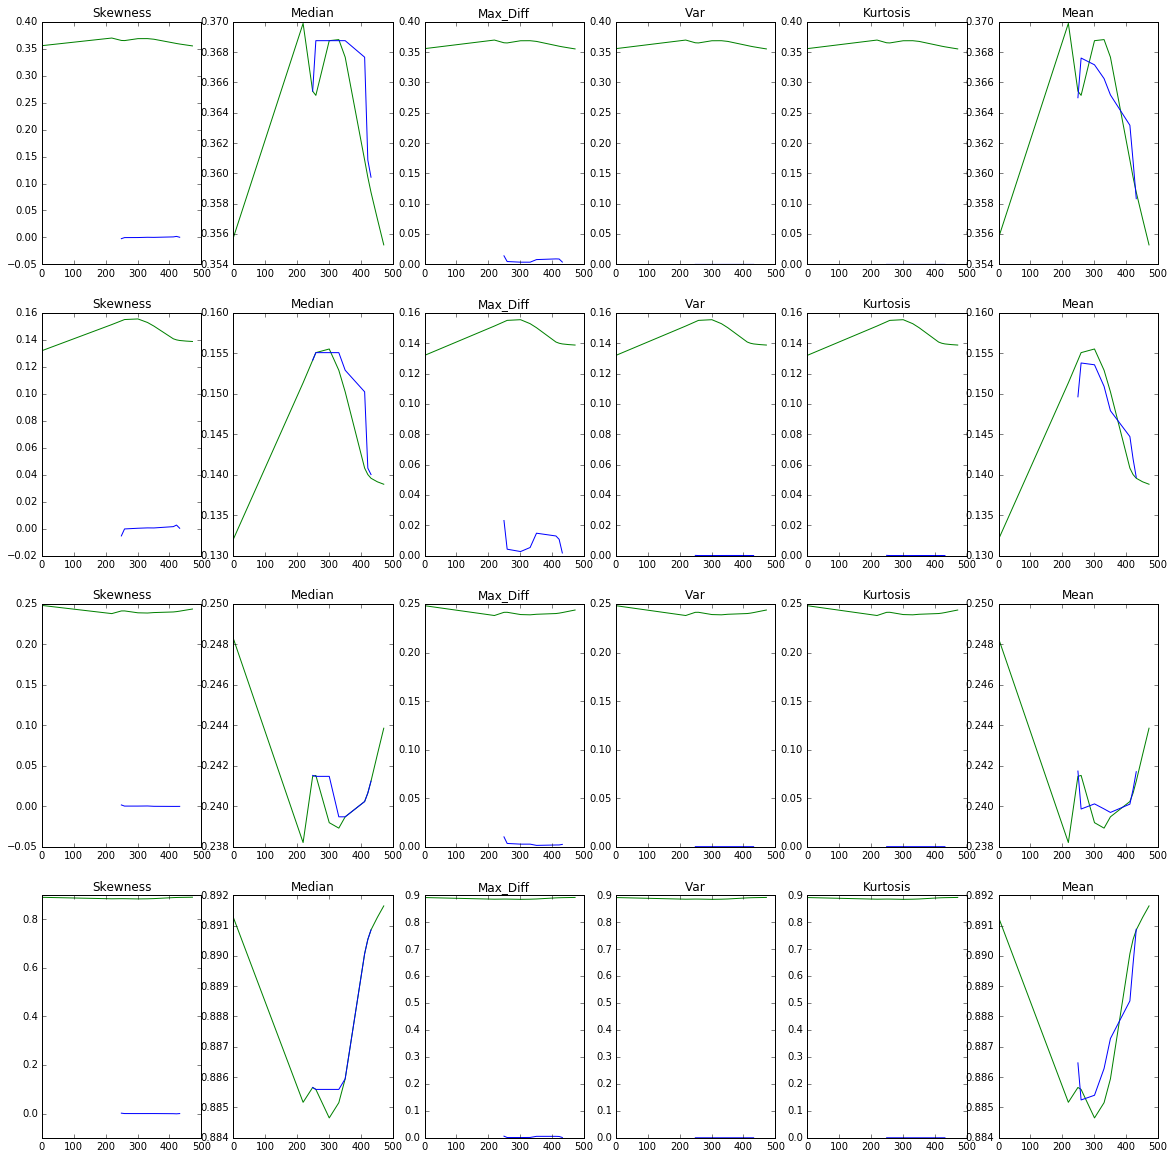

In [466]:
plot_events_statistics(example_rotation, rotation_relevant_features, window_size=4)

## Seems clear that Rotation vector might not be fast enough for this

In [7]:
taps_sframe = taps
individual_taps = graphlab.SFrame()

In [522]:
n_taps = len(taps_sframe['ID'].unique())
sum_events = 0
sum_before = 0
sum_during = 0
sum_after = 0
sum_swipe = 0
sum_tap = 0
l = 0
for id in taps_sframe['ID'].unique():
    tap = taps_sframe[taps_sframe['ID'] == id]
    sum_events += len(tap)
    sum_before += len(tap[tap['when'] == "BEFORE"])
    sum_during += len(tap[tap['when'] == "DURING"])
    sum_after += len(tap[tap['when'] == "AFTER"])
    if tap[0]['type'] == "SWIPE":
        sum_swipe += len(tap[tap['when'] == "DURING"])
    else:
        sum_tap += len(tap[tap['when'] == "DURING"])
    
print "Average of events per tap", sum_events / n_taps
print "Average of events before tap", sum_before / n_taps
print "Average of events during tap", sum_during / n_taps
print "Average of events after tap", sum_after / n_taps
print "Average of events during tap for swipes", 2*sum_swipe / n_taps
print "Average of events during tap for taps",2*sum_tap / n_taps

Average of events per tap 136
Average of events before tap 45
Average of events during tap 15
Average of events after tap 75
Average of events during tap for swipes 16
Average of events during tap for taps 14
